The Sales Team wants to analyze the average time it takes for customers to place their first order after registration. * Create a calculated field to calculate the days between the customer registration date (registered_date) and the first order date (order_date). Use the formula: DATE_DIFF(order_date, registered_date, DAY). * Create a scorecard showing the average number of days for customers to place their first order. * Create a histogram to visualize the distribution of the time taken for customers to place their first order.

📊 Average Days for Customers to Place First Order: 22.38 days


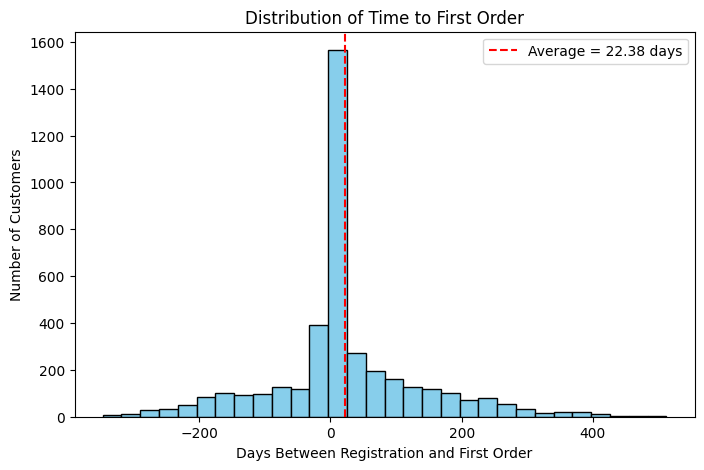

In [1]:
# 📌 Task: Average Time to First Order After Registration

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure dates are in datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['registered_date'] = pd.to_datetime(df['registered_date'], errors='coerce')

# Step 3: Find first order per customer
first_orders = df.groupby('customer_id')['order_date'].min().reset_index()
first_orders = first_orders.merge(df[['customer_id', 'registered_date']].drop_duplicates(), on='customer_id')

# Step 4: Calculate days between registration and first order
first_orders['days_to_first_order'] = (first_orders['order_date'] - first_orders['registered_date']).dt.days

# Step 5: Average days (scorecard)
avg_days = first_orders['days_to_first_order'].mean()
print(f"📊 Average Days for Customers to Place First Order: {avg_days:.2f} days")

# Step 6: Histogram visualization
plt.figure(figsize=(8,5))
plt.hist(first_orders['days_to_first_order'].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.axvline(avg_days, color="red", linestyle="--", label=f"Average = {avg_days:.2f} days")
plt.title("Distribution of Time to First Order")
plt.xlabel("Days Between Registration and First Order")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()
